# Bank-Full ML

Relevant Information:

   The data is related with direct marketing campaigns of a Portuguese banking institution. 
   The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, 
   in order to access if the product (bank term deposit) would be (or not) subscribed. 

Number of Instances: 45211 for bank-full.csv

Number of Attributes: 16 + output attribute.

# Target

Find and define correlation between variable to client subscription 

# Feature Description

Relevant Information:

   The data is related with direct marketing campaigns of a Portuguese banking institution. 
   The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, 
   in order to access if the product (bank term deposit) would be (or not) subscribed. 

Number of Instances: 45211 for bank-full.csv

Number of Attributes: 16 + output attribute.

Attribute information:

   Input variables:
   # bank client data:
   1 - age (numeric)
   2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services") 
   3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
   4 - education (categorical: "unknown","secondary","primary","tertiary")
   5 - default: has credit in default? (binary: "yes","no")
   6 - balance: average yearly balance, in euros (numeric) 
   7 - housing: has housing loan? (binary: "yes","no")
   8 - loan: has personal loan? (binary: "yes","no")
   # related with the last contact of the current campaign:
   9 - contact: contact communication type (categorical: "unknown","telephone","cellular") 
  10 - day: last contact day of the month (numeric)
  11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
  12 - duration: last contact duration, in seconds (numeric)
   # other attributes:
  13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
  15 - previous: number of contacts performed before this campaign and for this client (numeric)
  16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

  Output variable (desired target):
  17 - y - has the client subscribed a term deposit? (binary: "yes","no")


# Data Overview

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
import random

import statsmodels as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.feature_selection import SelectKBest, chi2, f_classif, f_regression
from sklearn.ensemble import ExtraTreesClassifier, ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split, cross_validate, cross_val_score

# for undersampling & oversampling
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss, TomekLinks
from imblearn.combine import SMOTETomek
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, recall_score, roc_auc_score, roc_curve, precision_score, f1_score

import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv(r'C:\Users\RIzkyeka00\Downloads\bank-full.csv', delimiter =';')

In [6]:
df.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no

In [7]:
df.tail()

age           job   marital  education default  balance housing loan  \
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day month  duration  campaign  pdays  previous poutcome    y  
45206   cellular   17   nov       977         3     -1         0  unknown  yes  
45207   cellular   17   nov       456         2     -1         0  unknown  yes  
45208   cellular   17   nov      1127         5    184         3  success  yes  
45209  telephone   17   nov       508         4     -1         0  unknown   no  
45210   cellular   17   nov       361         2    188        11    other   no

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [9]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [10]:
# mengecek unique features
unfe = []
for i in df.columns:
    unfe.append([i, df[i].nunique(), df[i].drop_duplicates().values])

unique = pd.DataFrame(unfe,columns=["Features", "Unique Number", "Values"])
unique

Features  Unique Number  \
0         age             77   
1         job             12   
2     marital              3   
3   education              4   
4     default              2   
5     balance           7168   
6     housing              2   
7        loan              2   
8     contact              3   
9         day             31   
10      month             12   
11   duration           1573   
12   campaign             48   
13      pdays            559   
14   previous             41   
15   poutcome              4   
16          y              2   

                                               Values  
0   [58, 44, 33, 47, 35, 28, 42, 43, 41, 29, 53, 5...  
1   [management, technician, entrepreneur, blue-co...  
2                         [married, single, divorced]  
3             [tertiary, secondary, unknown, primary]  
4                                           [no, yes]  
5   [2143, 29, 2, 1506, 1, 231, 447, 121, 593, 270...  
6                                           [yes, no]  
7                                           [no, yes]  
8                      [unknown, cellular, telephone]  
9   [5, 6, 7, 8, 9, 12, 13, 14, 15, 16, 19, 20, 21...  
10  [may, jun, jul, aug, oct, nov, dec, jan, feb, ...  
11  [261, 151, 76, 92, 198, 139, 217, 380, 50, 55,...  
12  [1, 2, 3, 5, 4, 6, 7, 8, 9, 10, 11, 12, 13, 19...  
13  [-1, 151, 166, 91, 86, 143, 147, 89, 140, 176,...  
14  [0, 3, 1, 4, 2, 11, 16, 6, 5, 10, 12, 7, 18, 9...  
15                 [unknown, failure, other, success]  
16                                          [no, yes]

In [11]:
df = df.drop([ 'day', 'month', 'pdays', 'contact', 'duration','previous', 'poutcome'],axis=1)

In [12]:
df.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   campaign   y  
0         1  no  
1         1  no  
2         1  no  
3         1  no  
4         1  no

In [13]:
df.tail()

age           job   marital  education default  balance housing loan  \
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

       campaign    y  
45206         3  yes  
45207         2  yes  
45208         5  yes  
45209         4   no  
45210         2   no

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   campaign   45211 non-null  int64 
 9   y          45211 non-null  object
dtypes: int64(3), object(7)
memory usage: 3.4+ MB


In [15]:
df.describe().T

count         mean          std     min   25%    50%     75%  \
age       45211.0    40.936210    10.618762    18.0  33.0   39.0    48.0   
balance   45211.0  1362.272058  3044.765829 -8019.0  72.0  448.0  1428.0   
campaign  45211.0     2.763841     3.098021     1.0   1.0    2.0     3.0   

               max  
age           95.0  
balance   102127.0  
campaign      63.0

## Data Preprocessing

### missing value handling

In [16]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
campaign     0
y            0
dtype: int64

there is no  missing value

### Checking & Handling Outliers

In [17]:
def find_outlier(data):
    Q1 = np.quantile(data, .25)
    Q3 = np.quantile(data, .75)
    
    IQR = Q3-Q1
    min_IQR = Q1-1.5*IQR
    max_IQR = Q3+1.5*IQR
    
    low_out =[]
    upper_out = []
    
    for i in data:
        if(i<min_IQR):
            low_out.append(i)
        if (i > max_IQR):
            upper_out.append(i)
    return low_out, upper_out

In [18]:
lower_out = [find_outlier(df[i])[0] for i in df.columns[df.dtypes != object]]
upper_out = [find_outlier(df[i])[1] for i in df.columns[df.dtypes != object]]

outlier = pd.DataFrame({
    "Jumlah Outlier":[len(i) + len(j) for i,j in zip(lower_out,upper_out)],
    "Persentase Outlier":[(len(i) + len(j)) / len(df) * 100 for i,j in zip(lower_out,upper_out)]
}).set_index(df.columns[df.dtypes != object]).sort_values("Jumlah Outlier",ascending=False)
outlier

Jumlah Outlier  Persentase Outlier
balance             4729           10.459844
campaign            3064            6.777112
age                  487            1.077171

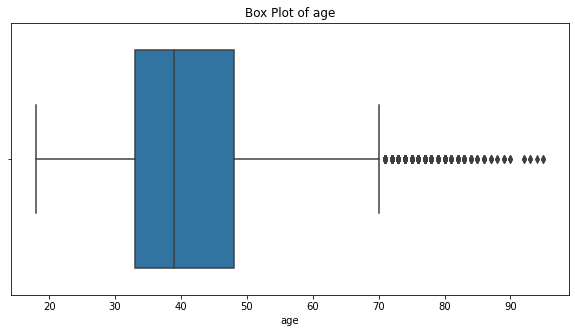

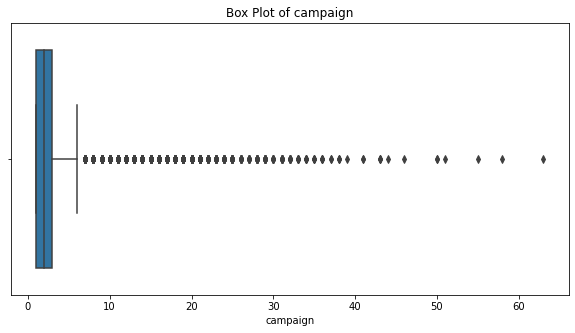

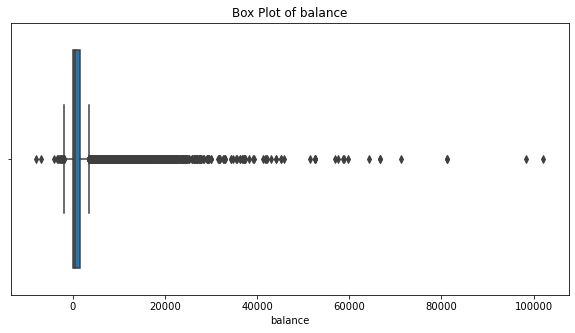

In [19]:
for i in df[['age', 'campaign', 'balance']]:   
    plt.figure(figsize=(10,5))
    sns.boxplot(data=df,x=df[i])
    plt.title(f"Box Plot of {i}")
plt.show()

In [20]:
# Find outlier using IQR
def outliers(df_new):
    Q1 = np.quantile(df_new, .25)
    Q3 = np.quantile(df_new, .75)
    #
    IQR = Q3-Q1
    min_IQR = Q1-1.5*IQR
    max_IQR = Q3+1.5*IQR
    #
    low_out =[]
    upper_out = []
    #
    for i in df_new:
        if(i<min_IQR):
            low_out.append(i)
        if (i > max_IQR):
            upper_out.append(i)
    return low_out, upper_out

In [21]:
df_new = df.copy()
outlier_dict = {}
for i in df_new:
     if (df_new[i].dtypes == 'int64'): 
        lower_out = outliers(df_new[i])[0]
        upper_out = outliers(df_new[i])[1]
        outlier_dict[i] = (lower_out, upper_out)

In [22]:
df_new = df.copy()
for i in df_new[['age', 'balance', 'campaign']]:
    if (df_new[i].dtypes == 'int64'):
        threshold = min(outlier_dict[i][1])
        df_new = df_new[df_new[i]< threshold]

In [23]:
### df_new overview

In [24]:
df_new.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   campaign   y  
0         1  no  
1         1  no  
2         1  no  
3         1  no  
4         1  no

In [25]:
df_new.describe().T

count        mean         std     min   25%    50%    75%     max
age       37368.0   40.263220    9.937012    18.0  32.0   39.0   48.0    70.0
balance   37368.0  638.569230  846.984206 -8019.0  47.0  350.0  979.0  3462.0
campaign  37368.0    2.134928    1.317559     1.0   1.0    2.0    3.0     6.0

In [26]:
df_new['y'].value_counts()

no     33142
yes     4226
Name: y, dtype: int64

In [27]:
df_new['education'].value_counts()

secondary    19737
tertiary     10600
primary       5564
unknown       1467
Name: education, dtype: int64

In [28]:
df_new.to_csv('Bank_ready.csv', index = False)

## Feature Engineering

### Scaling

In [29]:
#import lib
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
scaler = MinMaxScaler()

In [30]:
df1=df_new.copy()

In [31]:
for i in df1:
    if (df_new[i].dtypes == 'int64'):
        df1[i]=scaler.fit_transform(df1[[i]])

In [32]:
df1.head()

age           job  marital  education default   balance housing loan  \
0  0.769231    management  married   tertiary      no  0.885115     yes   no   
1  0.500000    technician   single  secondary      no  0.700984     yes   no   
2  0.288462  entrepreneur  married  secondary      no  0.698633     yes  yes   
3  0.557692   blue-collar  married    unknown      no  0.829632     yes   no   
4  0.288462       unknown   single    unknown      no  0.698545      no   no   

   campaign   y  
0       0.0  no  
1       0.0  no  
2       0.0  no  
3       0.0  no  
4       0.0  no

### Encoding

In [33]:
# import library untuk encoder
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

In [34]:
# contoh dengan ordinal encoder, gunakan fit_transform untuk encode data
df_enc = df1.copy()
#education ordinal encoding with unknown class
edu_order=['tertiary', 'secondary', 'primary', 'unknown']
df_enc["education"] = OrdinalEncoder(categories=[edu_order]).fit_transform(df_enc[["education"]])

In [35]:
marital_order=['single', 'divorced', 'married']
df_enc["marital"] = OrdinalEncoder(categories=[marital_order]).fit_transform(df_enc[["marital"]])

In [36]:
df_enc.head()

age           job  marital  education default   balance housing loan  \
0  0.769231    management      2.0        0.0      no  0.885115     yes   no   
1  0.500000    technician      0.0        1.0      no  0.700984     yes   no   
2  0.288462  entrepreneur      2.0        1.0      no  0.698633     yes  yes   
3  0.557692   blue-collar      2.0        3.0      no  0.829632     yes   no   
4  0.288462       unknown      0.0        3.0      no  0.698545      no   no   

   campaign   y  
0       0.0  no  
1       0.0  no  
2       0.0  no  
3       0.0  no  
4       0.0  no

In [37]:
# gunakan drop first
df_enc = pd.get_dummies(df_enc, prefix='housing', columns=['housing'], drop_first = True)
df_enc = pd.get_dummies(df_enc, prefix='default', columns=['default'], drop_first = True)
df_enc = pd.get_dummies(df_enc, prefix='loan', columns=['loan'], drop_first = True)
df_enc = pd.get_dummies(df_enc, prefix='y', columns=['y'], drop_first = True)
df_enc = pd.get_dummies(df_enc, prefix='j', columns=['job'], drop_first = True)

In [38]:
df_enc.head()

age  marital  education   balance  campaign  housing_yes  default_yes  \
0  0.769231      2.0        0.0  0.885115       0.0            1            0   
1  0.500000      0.0        1.0  0.700984       0.0            1            0   
2  0.288462      2.0        1.0  0.698633       0.0            1            0   
3  0.557692      2.0        3.0  0.829632       0.0            1            0   
4  0.288462      0.0        3.0  0.698545       0.0            0            0   

   loan_yes  y_yes  j_blue-collar  j_entrepreneur  j_housemaid  j_management  \
0         0      0              0               0            0             1   
1         0      0              0               0            0             0   
2         1      0              0               1            0             0   
3         0      0              1               0            0             0   
4         0      0              0               0            0             0   

   j_retired  j_self-employed  j_services  j_student  j_technician  \
0          0                0           0          0             0   
1          0                0           0          0             1   
2          0                0           0          0             0   
3          0                0           0          0             0   
4          0                0           0          0             0   

   j_unemployed  j_unknown  
0             0          0  
1             0          0  
2             0          0  
3             0          0  
4             0          1

## Feature Selection

In [39]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif, f_regression
from sklearn.ensemble import ExtraTreesClassifier, ExtraTreesRegressor

In [40]:
X = df_enc.drop(columns=["y_yes"])
y = df_enc["y_yes"]

In [41]:
anov = SelectKBest(score_func = f_classif)
fit = anov.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [42]:
#  concat kedua dataframes
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Specs', 'Score'] # memberi nama dataframe columns
featureScores.nlargest(10, 'Score') # print top 10 features

Specs       Score
5     housing_yes  697.992479
3         balance  286.229974
15      j_student  255.381986
1         marital  209.318708
8   j_blue-collar  172.120405
7        loan_yes  154.197728
2       education  152.227412
4        campaign  150.383626
12      j_retired   63.253565
11   j_management   48.234069

#### Filter Method with Heatmap

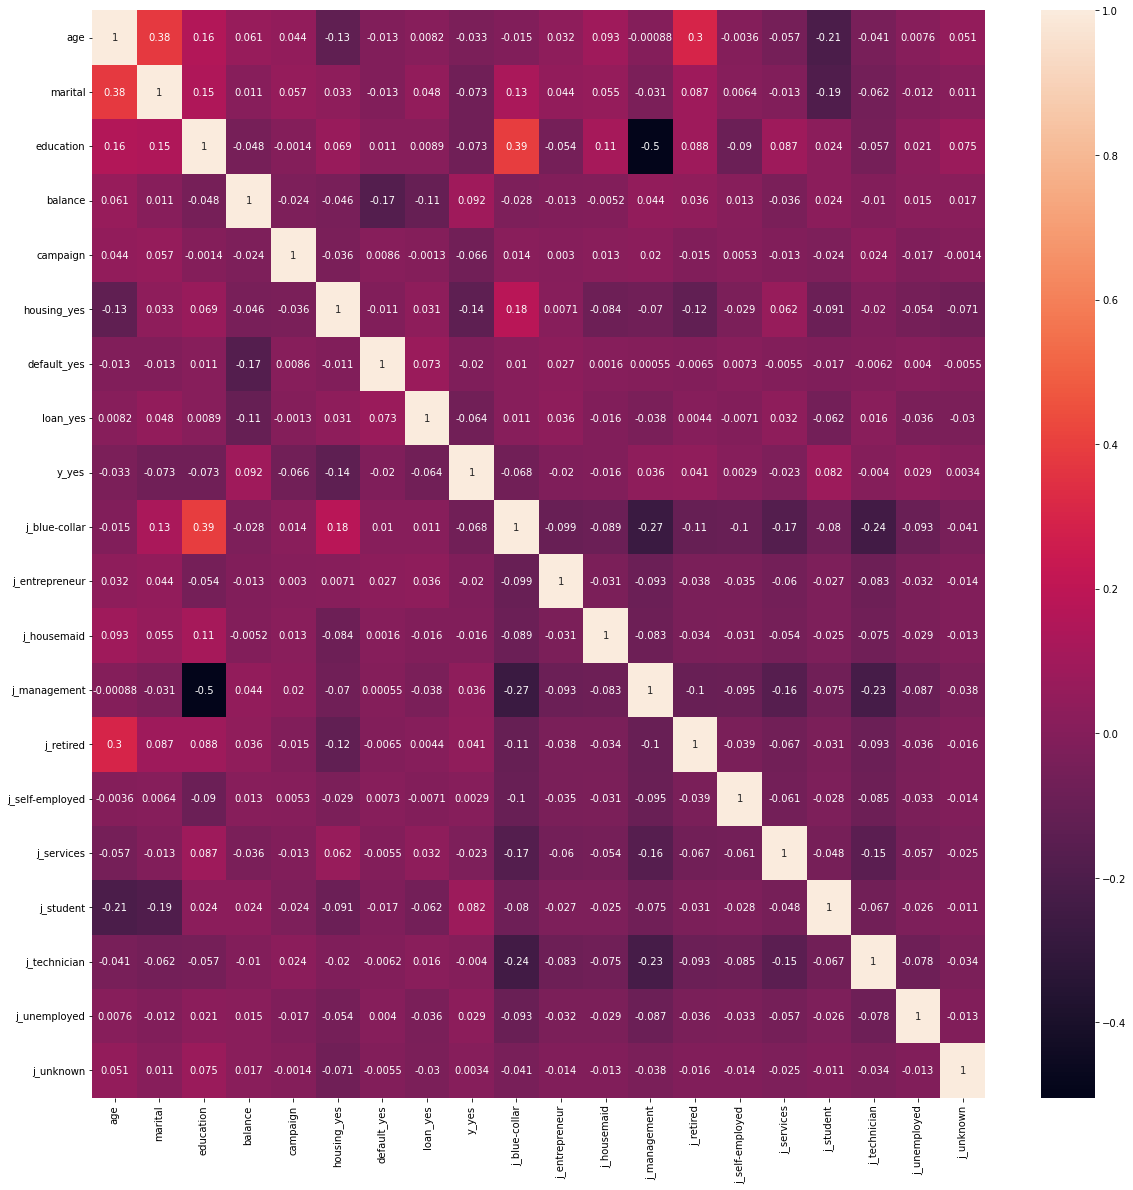

In [43]:
plt.figure(figsize=(20,20))
sns.heatmap(df_enc.corr("spearman"), annot=True)
plt.show()

In [44]:
model = ExtraTreesClassifier() 
model.fit(X,y) 
print(model.feature_importances_)

[0.30954042 0.02002293 0.03669329 0.49120456 0.06087547 0.02205115
 0.00350173 0.00923057 0.00503301 0.00339656 0.00290466 0.00554148
 0.00311924 0.00406739 0.00485297 0.00601666 0.00628503 0.00385028
 0.00181259]


In [45]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(12)

balance          0.491205
age              0.309540
campaign         0.060875
education        0.036693
housing_yes      0.022051
marital          0.020023
loan_yes         0.009231
j_technician     0.006285
j_student        0.006017
j_management     0.005541
j_blue-collar    0.005033
j_services       0.004853
dtype: float64

In [46]:
col = feat_importances.nlargest(6).index.tolist()

In [47]:
df_fin = df_enc[col]

In [48]:
df_enc[col].head()

balance       age  campaign  education  housing_yes  marital
0  0.885115  0.769231       0.0        0.0            1      2.0
1  0.700984  0.500000       0.0        1.0            1      0.0
2  0.698633  0.288462       0.0        1.0            1      2.0
3  0.829632  0.557692       0.0        3.0            1      2.0
4  0.698545  0.288462       0.0        3.0            0      0.0

In [49]:
df_h = df_enc.drop(columns=['default_yes','j_blue-collar',	'j_entrepreneur',	'j_housemaid'	,'j_management',	'j_retired',	'j_self-employed',	'j_services',	'j_student',	'j_technician',	'j_unemployed',	'j_unknown'])

In [50]:
df_h.head()

age  marital  education   balance  campaign  housing_yes  loan_yes  \
0  0.769231      2.0        0.0  0.885115       0.0            1         0   
1  0.500000      0.0        1.0  0.700984       0.0            1         0   
2  0.288462      2.0        1.0  0.698633       0.0            1         1   
3  0.557692      2.0        3.0  0.829632       0.0            1         0   
4  0.288462      0.0        3.0  0.698545       0.0            0         0   

   y_yes  
0      0  
1      0  
2      0  
3      0  
4      0

In [51]:
df_h.to_csv('Bank_h.csv', index = False)

## Modelling

### Logistic Regression

In [52]:
# SPLIT TARGET
X = df_enc[col]
y = df_enc['y_yes']

In [53]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, recall_score, roc_auc_score, roc_curve, precision_score, f1_score

# untuk undersampling & oversampling
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss, TomekLinks
from imblearn.combine import SMOTETomek

In [54]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) # size test = 20%

In [55]:
# cek sebelum resampling
print('X_train sebelum Resampling', X_train.shape)
print('y_train sebelum Resampling', y_train.shape, '\n')

print("label '1' sebelum Resampling", sum(y_train == 1))
print("label '0' sebelum Resampling", sum(y_train == 0))

X_train sebelum Resampling (29894, 6)
y_train sebelum Resampling (29894,) 

label '1' sebelum Resampling 3427
label '0' sebelum Resampling 26467


In [56]:
# gunakan SMOTE+tomeklinks
st = SMOTETomek()
X_train_st, y_train_st = st.fit_resample(X_train, y_train)

In [57]:
# cek sesudah resampling
print('X_train sesudah Resampling', X_train_st.shape)
print('y_train sesudah Resampling', y_train_st.shape, '\n')

print("label '1' sesudah Resampling", sum(y_train_st == 1))
print("label '0' sesudah Resampling", sum(y_train_st == 0))

X_train sesudah Resampling (48082, 6)
y_train sesudah Resampling (48082,) 

label '1' sesudah Resampling 24041
label '0' sesudah Resampling 24041


In [58]:
y_train.value_counts()

0    26467
1     3427
Name: y_yes, dtype: int64

In [59]:
# buat y predict
model = LogisticRegression(random_state = 0)
model.fit(X_train_st, y_train_st)

# Predicting Test Set
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

results = pd.DataFrame([['Logistic Regression (Lasso)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

In [60]:
# buat df untuk stare hasil actual vs pred 
result = pd.DataFrame()
result["y_act"] = y_test
result["y_pred"] = y_pred

In [61]:
# cek hasil
result.head()

y_act  y_pred
35455      0       0
7367       0       0
194        0       0
6864       0       1
35782      0       0

In [62]:
[model.intercept_,model.coef_]

[array([-1.15262594]),
 array([[ 3.05069427, -0.12293911, -0.93797157, -0.21573194, -0.89821248,
         -0.23402436]])]

In [63]:
# melihat probability
y_pred_proba = model.predict_proba(X_test)

In [64]:
# probability data ke 1
y_pred_proba[0]

array([0.69659422, 0.30340578])

In [65]:
# cek hasil percobaan
cek = X_test.iloc[:1]

In [66]:
cek

balance       age  campaign  education  housing_yes  marital
35455  0.712569  0.673077       0.2        1.0            1      2.0

In [67]:
# confusion matrix
print(confusion_matrix(y_test, y_pred))

[[4146 2529]
 [ 295  504]]


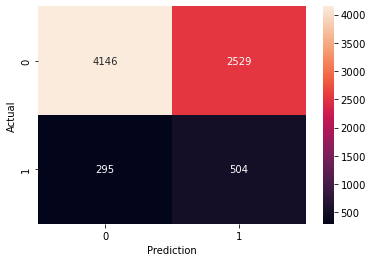

In [68]:
# plot confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".0f")
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.show()

In [69]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.62      0.75      6675
           1       0.17      0.63      0.26       799

    accuracy                           0.62      7474
   macro avg       0.55      0.63      0.50      7474
weighted avg       0.85      0.62      0.69      7474



The more important is recall feature, because the actual customer should not predicted as not customer. Contrast to not customer asummed to be customer could increase subs rate

In [70]:
# with hyper parameter
model_rs_tuned = LogisticRegression(C= 1, l1_ratio= 1, max_iter= 100, penalty= 'l1', solver= 'saga')
model_rs_tuned.fit(X_train_st, y_train_st)

LogisticRegression(C=1, l1_ratio=1, penalty='l1', solver='saga')

In [79]:
y_pred_rs_tuned = model_rs_tuned.predict(X_test)
print(classification_report(y_test, y_pred_rs_tuned))

              precision    recall  f1-score   support

           0       0.93      0.62      0.75      6675
           1       0.17      0.63      0.26       799

    accuracy                           0.62      7474
   macro avg       0.55      0.63      0.50      7474
weighted avg       0.85      0.62      0.69      7474



In [81]:
# plot roc auc curve
def plot_roc_curve(true_y, y_prob, labels):
    
    fpr,tpr,thresholds = roc_curve(true_y, y_prob)
    
    sns.lineplot(fpr, tpr, label=labels)
    plt.xlabel('false positive rate')
    plt.ylabel('false negative rate')

\model auc score:0.6265818227840981



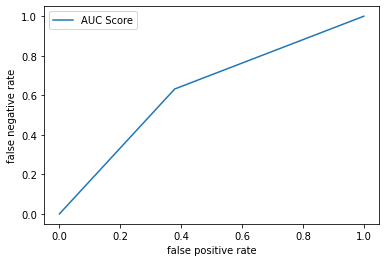

In [82]:
plot_roc_curve(y_test, y_pred_rs_tuned, 'AUC Score')
print(f'\model auc score:{roc_auc_score(y_test, y_pred_rs_tuned)}\n')

# Decision Tree Model

In [71]:
from sklearn.tree import DecisionTreeRegressor, plot_tree, export_graphviz

In [87]:
model = DecisionTreeClassifier(splitter="best", max_depth=100, criterion="gini")
model.fit(X_train_st, y_train_st)

DecisionTreeClassifier(max_depth=100)

In [88]:
# buat y predict
y_pred = model.predict(X_test)

In [89]:
# buat df untuk stare hasil actual vs pred 
result = pd.DataFrame()
result["y_act"] = y_test
result["y_pred"] = y_pred

In [90]:
# cek hasil
result

y_act  y_pred
35455      0       0
7367       0       1
194        0       1
6864       0       0
35782      0       0
...      ...     ...
25539      0       0
39069      0       1
27585      0       0
10893      0       0
45034      0       1

[7474 rows x 2 columns]

In [91]:
# buat kolom untuk nama feature dalam visualisasi
DT_cols = X_train_st.columns.tolist()

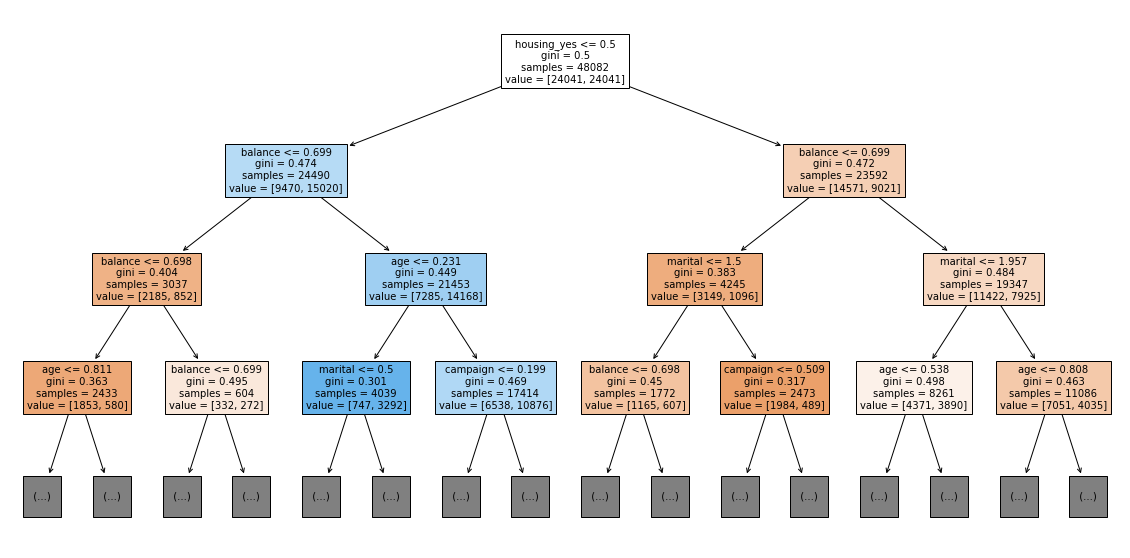

In [92]:
# plot decision tree
plt.figure(figsize=(20,10))
plot_tree(model,
          feature_names = DT_cols, impurity = True,
          fontsize = 10, max_depth = 3,
          filled = True)
# plt.savefig('dt_viz', dpi=100)
plt.show()

In [104]:
model_dt = DecisionTreeClassifier()
y_pred_dt= model_dt_tuned.predict(X_test)
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.91      0.82      0.86      6675
           1       0.19      0.35      0.24       799

    accuracy                           0.77      7474
   macro avg       0.55      0.58      0.55      7474
weighted avg       0.84      0.77      0.80      7474



In [93]:
model_dt_tuned = DecisionTreeClassifier(splitter="best", max_depth=100, criterion="gini").fit(X_train_st, y_train_st)

In [94]:
y_pred_dt_tuned = model_dt_tuned.predict(X_test)
print(classification_report(y_test, y_pred_dt_tuned))

              precision    recall  f1-score   support

           0       0.91      0.82      0.86      6675
           1       0.19      0.35      0.24       799

    accuracy                           0.77      7474
   macro avg       0.55      0.58      0.55      7474
weighted avg       0.84      0.77      0.80      7474



# Ensemble Model

## RandomForestClassifier

In [95]:
model_rfc_tuned = RandomForestClassifier(n_estimators = 500, min_samples_split = 2, min_samples_leaf = 2, max_depth = 40)
model_rfc_tuned.fit(X_train_st, y_train_st)

RandomForestClassifier(max_depth=40, min_samples_leaf=2, n_estimators=500)

In [96]:
y_pred_rfc_tuned = model_rfc_tuned.predict(X_test)
print(classification_report(y_test, y_pred_rfc_tuned))

              precision    recall  f1-score   support

           0       0.92      0.82      0.87      6675
           1       0.20      0.37      0.26       799

    accuracy                           0.77      7474
   macro avg       0.56      0.60      0.56      7474
weighted avg       0.84      0.77      0.80      7474



\model auc score:0.5961413377208402



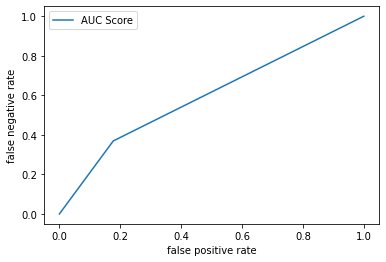

In [97]:
plot_roc_curve(y_test, y_pred_rfc_tuned, 'AUC Score')
print(f'\model auc score:{roc_auc_score(y_test, y_pred_rfc_tuned)}\n')

## XGBClassifier

In [103]:
model_xgc = XGBClassifier().fit(X_train_st, y_train_st)
y_pred_xgc = model_xgc.predict(X_test)
print(classification_report(y_test, y_pred_xgc))

              precision    recall  f1-score   support

           0       0.91      0.92      0.92      6675
           1       0.30      0.28      0.29       799

    accuracy                           0.85      7474
   macro avg       0.61      0.60      0.61      7474
weighted avg       0.85      0.85      0.85      7474



In [99]:
from xgboost import XGBClassifier
model_xgc_tuned = XGBClassifier(reg_lambda = 1, reg_alpha = 40, n_estimators = 200, max_depth = 10, gamma = 2, colsample_bytree=1, min_child_weight =10)
model_xgc_tuned.fit(X_train_st, y_train_st)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=2, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=10,
              missing=nan, monotone_constraints='()', n_estimators=200,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [100]:
y_pred_xgc_tuned = model_xgc_tuned.predict(X_test)
print(classification_report(y_test, y_pred_xgc_tuned))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91      6675
           1       0.28      0.36      0.32       799

    accuracy                           0.84      7474
   macro avg       0.60      0.63      0.61      7474
weighted avg       0.85      0.84      0.84      7474



\model auc score:0.6251160392438113



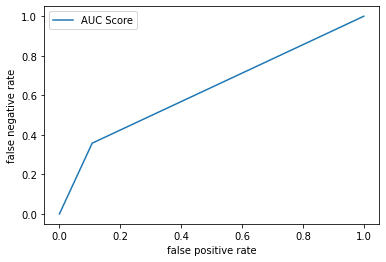

In [101]:
plot_roc_curve(y_test, y_pred_xgc_tuned, 'AUC Score')
print(f'\model auc score:{roc_auc_score(y_test, y_pred_xgc_tuned)}\n')


model AUC score (XGC) : 0.6251160392438113 -- Recall: 0.3579474342928661--F1 Score: 0.3170731707317074

model AUC score (LogisticReg) : 0.6265818227840981-- Recall: 0.6320400500625782--F1 Score: 0.26350117401513173

model AUC score (RFC) : 0.5961413377208402-- Recall: 0.3692115143929912--F1 Score: 0.2593406593406593

model AUC score (DecisionTree) : 0.5840798188747169-- Recall: 0.3479349186483104--F1 Score: 0.24418093983311373



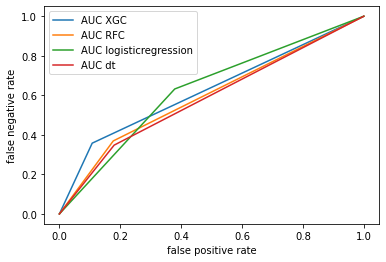

In [102]:
# plot roc auc
plot_roc_curve(y_test, y_pred_xgc_tuned, "AUC XGC")
plot_roc_curve(y_test, y_pred_rfc_tuned, "AUC RFC")
plot_roc_curve(y_test, y_pred_rs_tuned, "AUC logisticregression")
plot_roc_curve(y_test, y_pred_dt_tuned, "AUC dt")
print(f"\nmodel AUC score (XGC) : {roc_auc_score(y_test, y_pred_xgc_tuned)} -- Recall: {recall_score(y_test, y_pred_xgc_tuned)}--F1 Score: {f1_score(y_test, y_pred_xgc_tuned)}")
print(f"\nmodel AUC score (LogisticReg) : {roc_auc_score(y_test, y_pred_rs_tuned)}-- Recall: {recall_score(y_test, y_pred_rs_tuned)}--F1 Score: {f1_score(y_test, y_pred_rs_tuned)}")
print(f"\nmodel AUC score (RFC) : {roc_auc_score(y_test, y_pred_rfc_tuned)}-- Recall: {recall_score(y_test, y_pred_rfc_tuned)}--F1 Score: {f1_score(y_test, y_pred_rfc_tuned)}")
print(f"\nmodel AUC score (DecisionTree) : {roc_auc_score(y_test, y_pred_dt_tuned)}-- Recall: {recall_score(y_test, y_pred_dt_tuned)}--F1 Score: {f1_score(y_test, y_pred_dt_tuned)}\n")
plt.show()

rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

Our model results for the training and test data which focused on recall score suggest logisticregression model is the best to use to maximize recall score with recall_score 0.632 and AUC_Score = 0.6265. Other models perform similar results with recall score around 0.39 and auc score of 0.6 

# Summary

>Clients who have subscribed concentrated in 30-50 years old range, with balance lower than 10000 and mostly have secondary education, and single.

> asumming recall, to be not a problem, because not customer predicted as customer could increase subscription and pres

> The logisticregression model has the highest recall score among other models with recall_score of 0.632 and false negative as low as 0.17 and AUC Score of 0.625. 

> Descision tree model, random foresrclassification, and xgbclassification perform similar results before or after hyper parameter tuning
